In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import pandas as pd
import sqlite3
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline
rubin_sim.__version__

'1.3.2'

In [59]:
from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
print(f"Using {run_name}, to be read from {opsim_fname}")
# TODO: update to v3.3
# opsim_fname is being pulled from a rubin_sim command - Heather is going to update this.

Using baseline_v2.1_10yrs, to be read from /global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db


In [60]:
# Plot wish-list:
# After cutting to extragalactic WFD area, we want the following:
#   - Distribution of i-band coadd M5 values (ExgalM5WithCuts - applies the cuts mentioned above) at each data release from year 1 - year 10 (DR2-DR11)
#   - Later we want all bands, not just i
#   - Is there something for coadded PSF size?  Need to check.  Unclear.  Definitely has things for individual exposures.
# We want to be able to compare across different axes:
#   - For a given strategy, compare distributions at various years.
#   - For a given year, compare distributions across strategies.
#   - for a given year and strategy, compare distributions across bands.
# Ultimately we might summarize these in terms of a std or some percentile range.

## Let's start with a simple metric bundle of only the coaddm5 metric
Remember that the list of metrics is here: https://rubin-sim.lsst.io/rs_maf/metric_list.html

In [63]:
# Here we define a function for some of the metric plots we want to show.
# TODO: allow customization of metric choice and resolution, application of extragalactic area cut, results for intermediate years.
# Can use plot_funcs kwarg in metric_plots to change what is plotted.
# TODO: try plotting other things, getting summary stats.
# TODO: apply some filter to outputs (currently just forcing limits on plots)
try:
   nside=128
   surveyAreas = SkyAreaGenerator(nside=nside)
   map_footprints, map_labels = surveyAreas.return_maps()
except:
    pass
def metric_plots(use_run_name, use_opsim_fname, use_metric=maf.ExgalM5(), use_color_min=23, use_color_max=28):
    # use_run_name says which OpSim DB we want to use, e.g. `baseline_v2.1_10yrs` - will also be used for labels
    # use_opsim_fname says where it lives, e.g. `/global/cfs/cdirs/lsst/groups/CO/rubin_sim/sim_baseline/baseline_v2.1_10yrs.db`
    depth_map_bundle = maf.MetricBundle(
    metric=use_metric,
    # previous line was originally using maf.Coaddm5Metric()
    # slicer=maf.HealpixSlicer(nside=nside, use_cache=False, hpid=np.where(map_labels == "lowdust")[0]),
    slicer=maf.HealpixSlicer(nside=nside, use_cache=False),
    constraint="filter='i'",
    run_name=use_run_name,
    plot_dict={"color_min": use_color_min, "color_max": use_color_max, "x_min": use_color_min, "x_max": use_color_max}
    )

    bgroup = maf.MetricBundleGroup(
        [depth_map_bundle], use_opsim_fname
    )
    bgroup.run_all()
    return bgroup

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 5124 bins, returning 200
  warnings.warn(


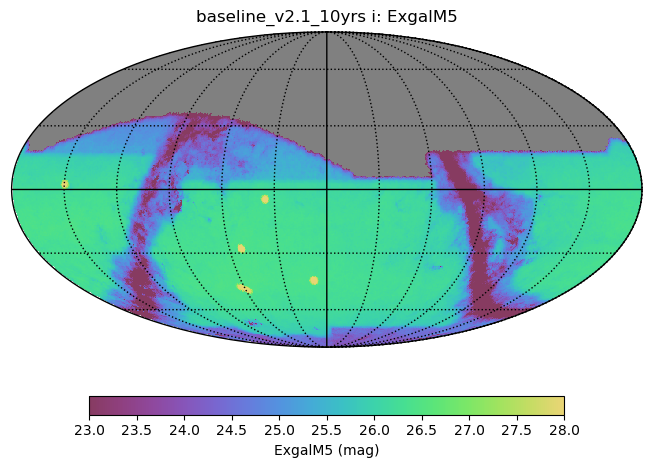

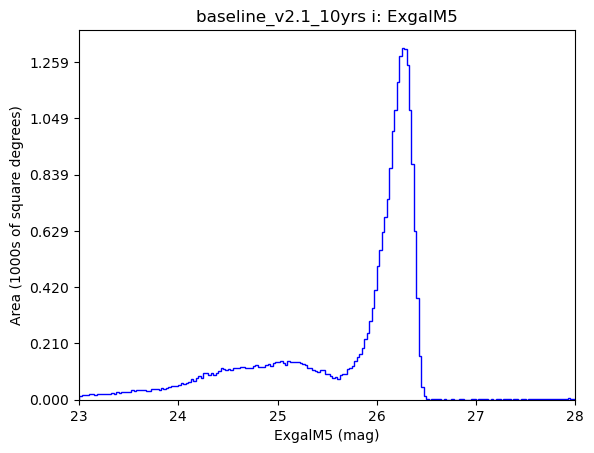

In [64]:
# Apply the above routine to our baseline sim, and show the plots
bgroup = metric_plots(run_name, opsim_fname)
bgroup.plot_all(closefigs=False)

### What if we want to change the opsim we are using?
We define a new opsim file name and then regenerate the metric on this new opsim

No roll v3.3 will be read from /pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/utils/maf_utils.py:143: UserWarning: Optimal bin calculation tried to make 5195 bins, returning 200
  warnings.warn(


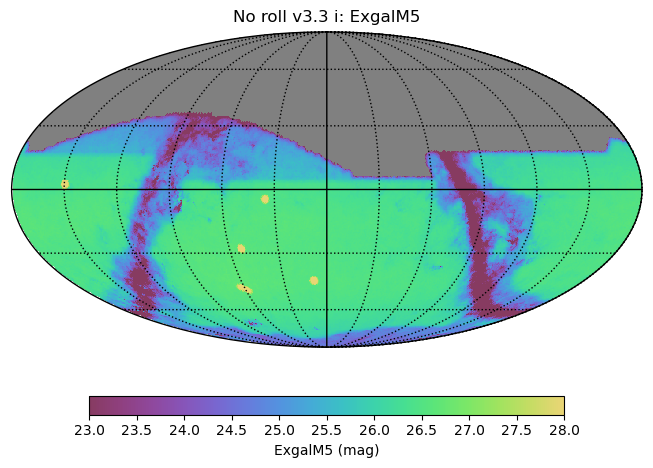

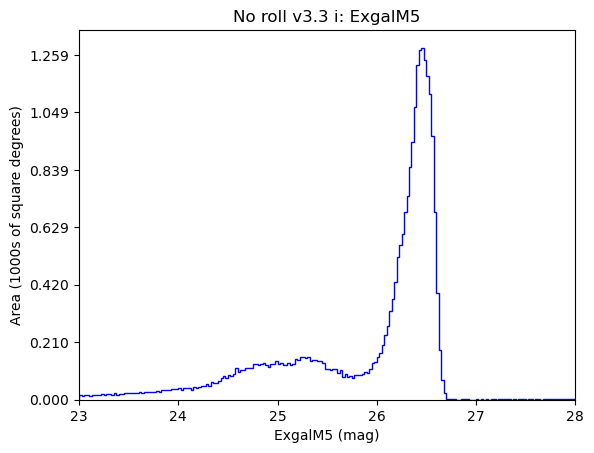

In [65]:
# This lives in Renee's space and she has hacked permissions so the rest of us can read it.  
# But Heather is going to make these accessible in a more sound way.  We'll make and show the same plots for this new strategy.
new_opsim_fname = '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db'
new_run_name = 'No roll v3.3'
print(f"{new_run_name} will be read from {new_opsim_fname}")
newbgroup = metric_plots(new_run_name, new_opsim_fname)
newbgroup.plot_all(closefigs=False)

We don't see a lot of difference given that we are comparing the coadded m5 magnitude